In [41]:
# Useful packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
# Data loading

train_titanic=pd.read_csv("train.csv")

test_titatinic=pd.read_csv("test.csv")

In [43]:
train_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data description

We have eleven variables:

    - PassengerId: Primary key that are unique for each passenger
    - Survived: feature that gives information about the status of a passenger after accident,
    (0/1)-(Died/Survived)
    - Pclass: The class that the passager was embarked
    - Name: Name of the passenger
    - Sex: gender of the passenger
    - Age : Age of passenger
    - SibSp: Number of siblings/spouse on board of titanic
    - Parch: Number of parent/children on board of titanic
    - Ticket: Ticket number
    - Fare: Price of passenger's ticket 
    - Cabin: Cabin number
    - Embarked: Port of embarkation

In [45]:
train_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have three variables which have some missing values. Quite higher for Cabin variable and Age with 687 and 177 NaN respectively.

In [46]:
from pyparsing import col

print(f"Shape of data before NaN treatment{train_titanic.shape}")

train_titanic["Age"]=train_titanic["Age"].fillna(train_titanic["Age"].mean())
train_titanic=train_titanic.drop(columns=["Cabin"])
train_titanic=train_titanic.dropna()

print(f"Shape of data after NaN treatment{train_titanic.shape}")

Shape of data before NaN treatment(891, 12)
Shape of data after NaN treatment(889, 11)


## Univariate analysis

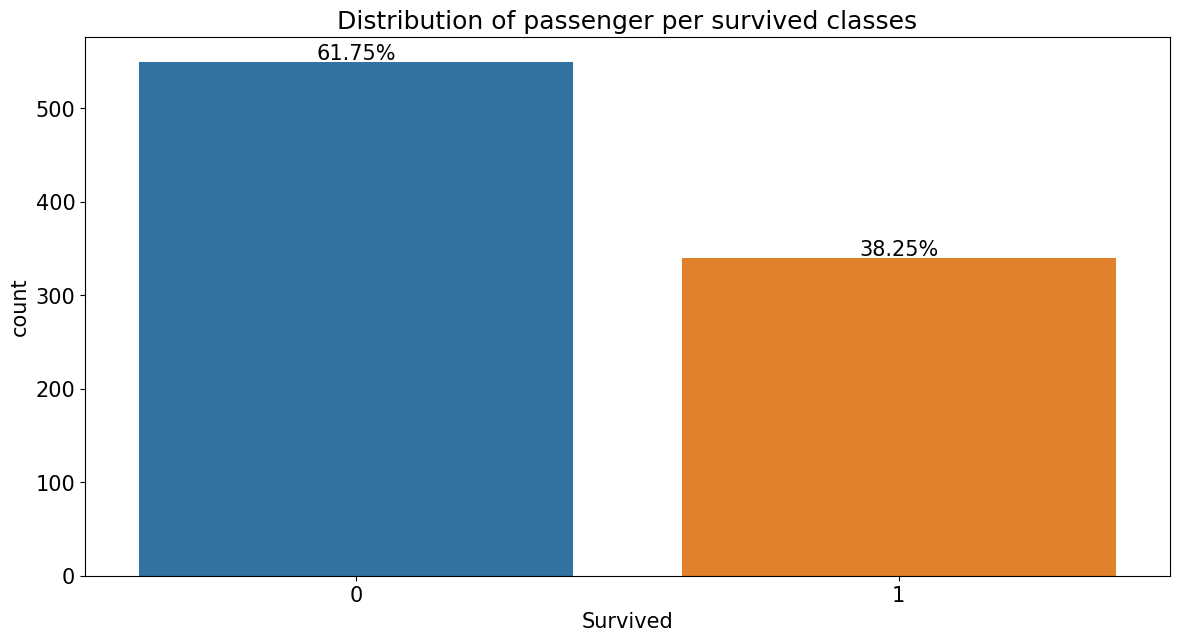

In [47]:
plt.figure(figsize=(14,7))
plt.rcParams.update({'font.size':15})
plt.title("Distribution of passenger per survived classes")
ax=sns.countplot(train_titanic,x='Survived')
total=train_titanic.shape[0]
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
plt.show()

Just 38.38% of passenger were saved from dying. It's quite lower percentage that explain the drama of this accident.

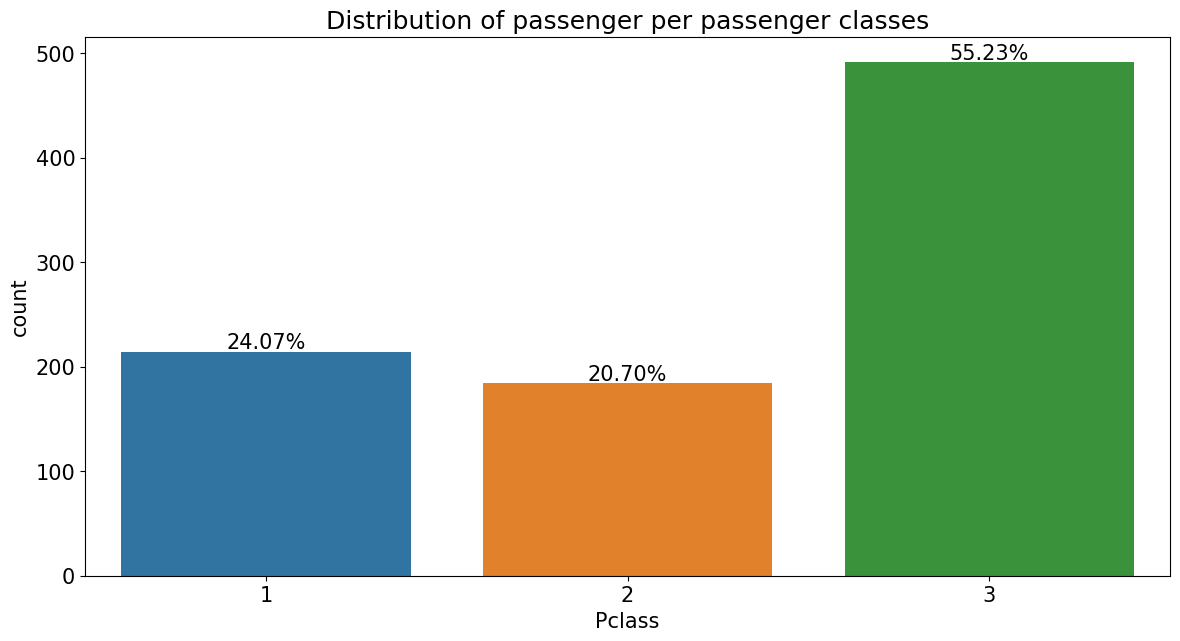

In [48]:
plt.figure(figsize=(14,7))
plt.rcParams.update({'font.size':15})
plt.title("Distribution of passenger per passenger classes")
ax=sns.countplot(data=train_titanic,x='Pclass')
total=train_titanic.shape[0]
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
plt.show()

Pclass 3 is the popular class that contains the most than half of all passender that embarked with 55.11%. The most expensive class 1 contains more passengers that the middle class with 24.24%. 

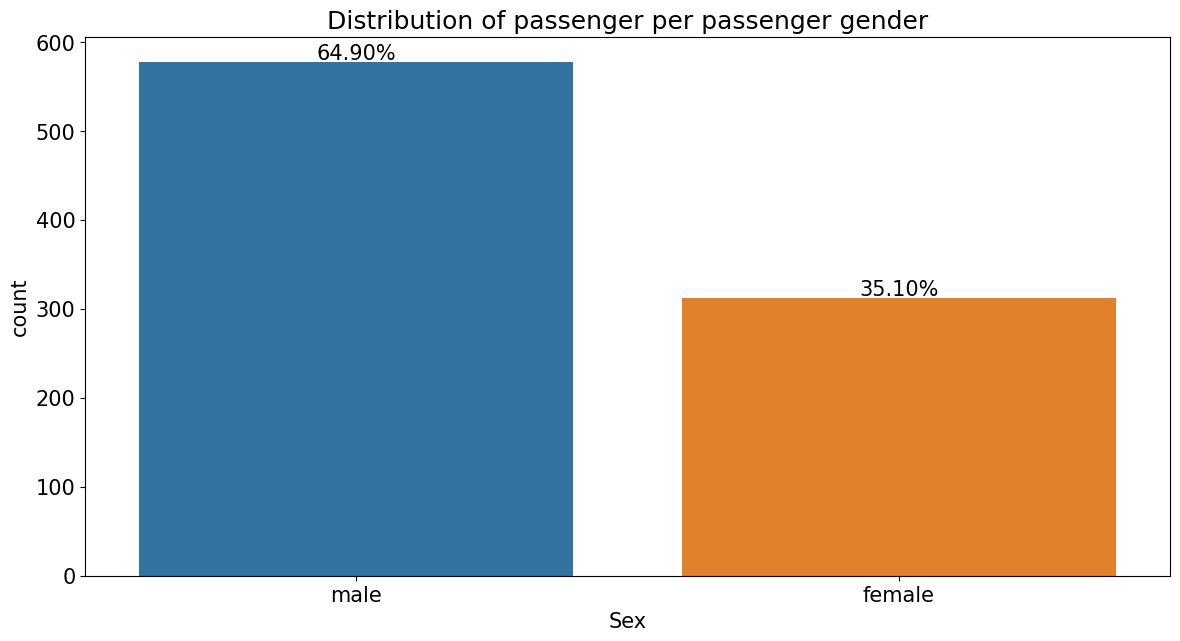

In [49]:
plt.figure(figsize=(14,7))
plt.rcParams.update({'font.size':15})
plt.title("Distribution of passenger per passenger gender")
ax=sns.countplot(data=train_titanic,x='Sex')
total=train_titanic.shape[0]
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
plt.show()

Male was overrepresented than female, they represent 64.76% and just 35.24%.

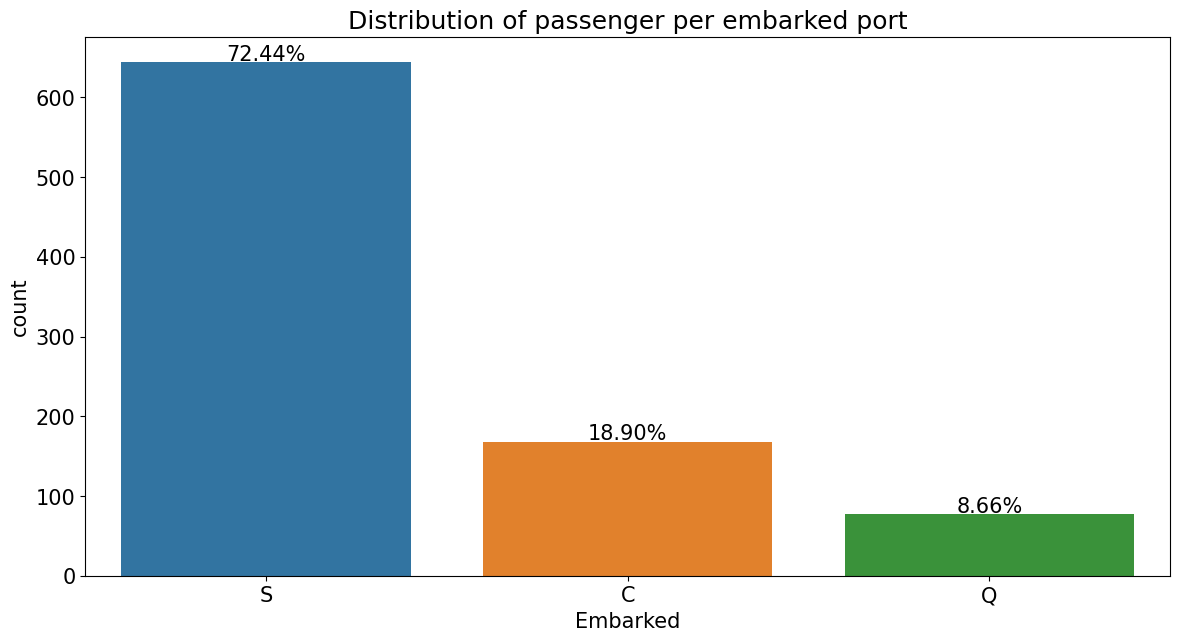

In [50]:
plt.figure(figsize=(14,7))
plt.rcParams.update({'font.size':15})
plt.title("Distribution of passenger per embarked port")
ax=sns.countplot(data=train_titanic,x='Embarked')
total=train_titanic.shape[0]
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
plt.show()

The distribution is like Pclass.

## Bivariate analysis

In [51]:
corr=train_titanic.drop(columns=['PassengerId']).corr()

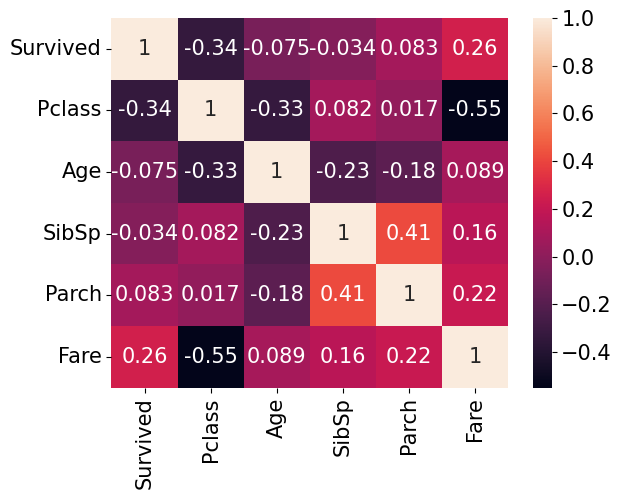

In [52]:
sns.heatmap(corr,annot=True)
plt.show()

In [53]:
train_titanic['Pclass']=train_titanic['Pclass'].astype('category')
train_titanic_numeric=pd.get_dummies(train_titanic.drop(columns=['PassengerId','Name','Ticket']))

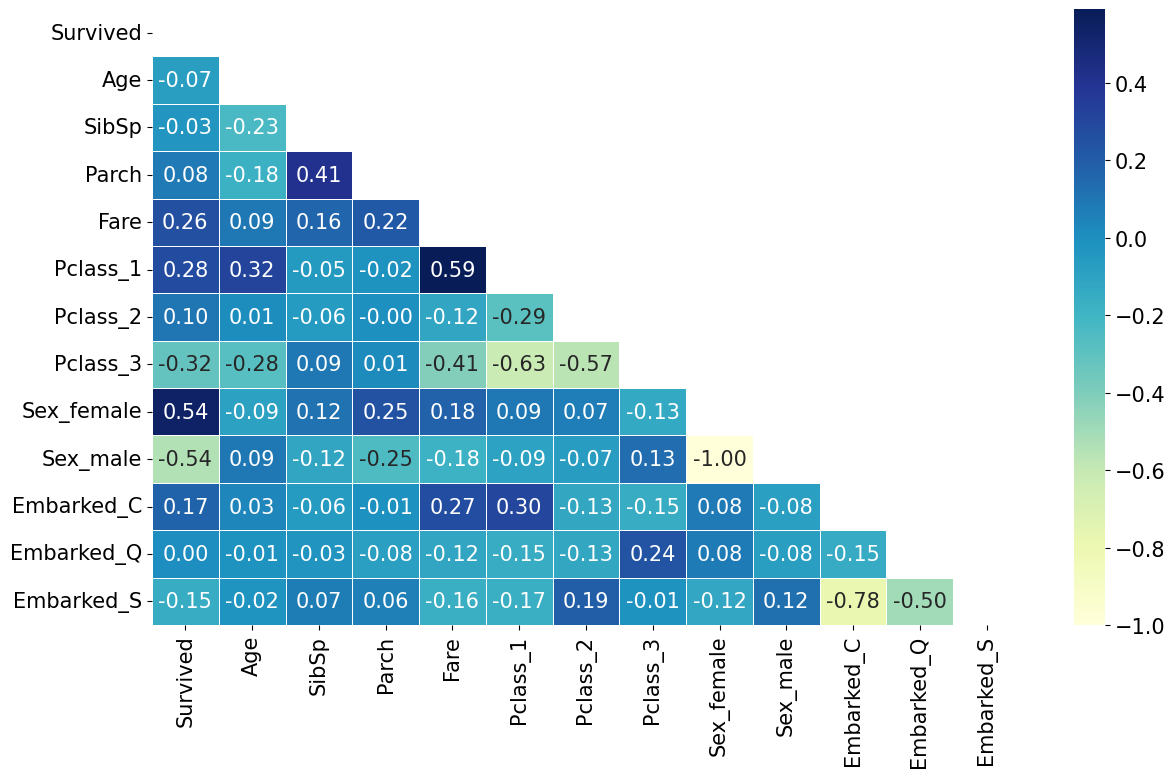

In [54]:
from hmac import digest_size
import numpy as np

corr_quite=train_titanic_numeric.corr()
mask=np.triu(np.ones_like(train_titanic_numeric.corr()))

plt.figure(figsize=(14,8))
sns.heatmap(corr_quite,annot=True,mask=mask,fmt='.2f',cmap="YlGnBu",linewidths=.5)
plt.show()

This correlation matrix details more the chance of survive of passenger based on the allowed attributes. First of all, female were lucky, they have a high probability to survive than male in the accident. After gender lucky, coming class that the passenger was sat, more you get top class more your chance of survive is high, specifically for those in the first class. As we know that fare and pclass are positively associated, more richer or you pay more you have more chance to survive. Place of embarkation also influences the chance of survive, as we can read on the above matrix, passenger of Cherbourg get more chance than others.

Otherwise according to the correlation analysis, more you get older, more you have siblings on the board your chance of dying growth with. For places, peoples in class 3, from southampton was quite defavrorised for saving. Finally males were the most impacted that can be explained by many factors like priority when saving.


**This analysis can be biaised by overreprensation for some modalities like sex, pclass 3**

In [55]:
train_titanic.drop(columns='PassengerId').pivot_table(index=['Survived','Sex'])

Age       Fare     Parch     SibSp
Survived Sex                                             
0        female  26.023272  23.024385  1.037037  1.209877
         male    31.175224  21.960993  0.207265  0.440171
1        female  28.797265  51.695617  0.519481  0.519481
         male    27.631705  40.821484  0.357798  0.385321

To go more deeper in our analyse, by this pivot table we can clearly notice that in average, `Fare` and shance of surviving strongly associated. Among female or male, for those who survived more than double of fare which ones who died. The last thing is that females paid more in average than males that can explain what we notice above but we have to check if it's not due to biais sample.

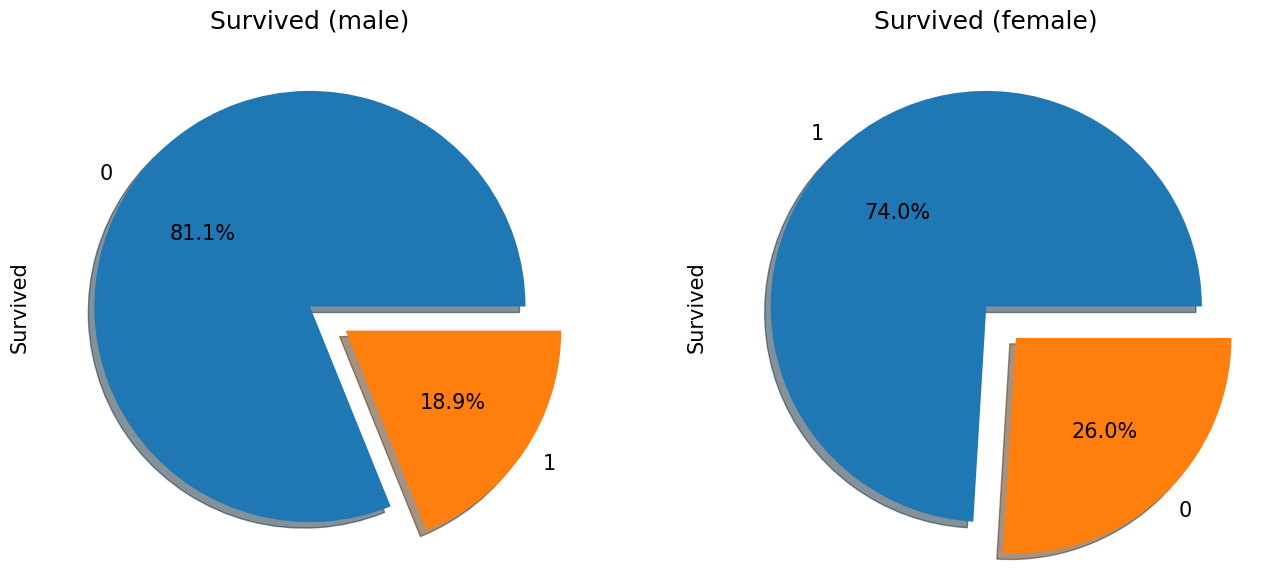

In [56]:

f,ax=plt.subplots(1,2,figsize=(16,7))
train_titanic['Survived'][train_titanic['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
train_titanic['Survived'][train_titanic['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()

In [57]:
def survivable_probability(df,feature):
    
    q1=train_titanic[feature].quantile(0.25)
    q2=train_titanic[feature].quantile(0.5)
    q3=train_titanic[feature].quantile(0.75)
    p1=df[df[feature]<=q1]["Survived"].sum()/df[df[feature]<=q1].shape[0]
    p2=df[df[feature]<=q2]["Survived"].sum()/df[df[feature]<=q2].shape[0]
    p3=df[df[feature]<=q3]["Survived"].sum()/df[df[feature]<=q3].shape[0]
    p4=df[df[feature]>q3]["Survived"].sum()/df[df[feature]>q3].shape[0]
    survivable_probabilities={
        round(q1,2):round(p1,2),
        round(q2,2):round(p2,2),
        round(q3,2):round(p3,2),
        "q3<":round(p4,2)
    }
    return survivable_probabilities

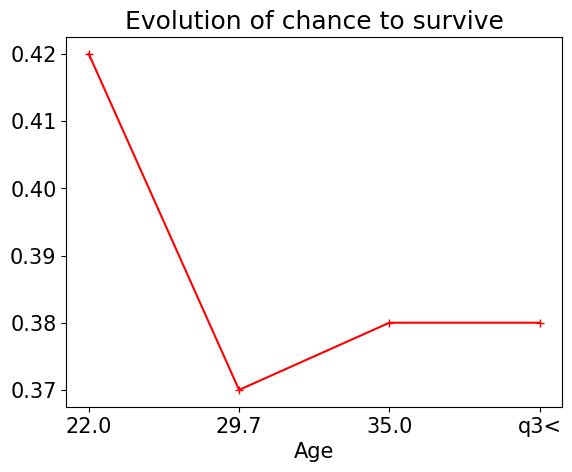

In [58]:
survivable_probabilities=survivable_probability(train_titanic,"Age")
plt.plot(survivable_probabilities.keys(),survivable_probabilities.values(),"r+-")
plt.title("Evolution of chance to survive")
plt.xlabel("Age")
plt.show()

The evolution of probability of surviving is not monotone then it's difficult to interprete based on linear relationship. For passengers were under 22 years was ones who have the most high probabilities of surviving with 42% by considering just Age as independant varaible.

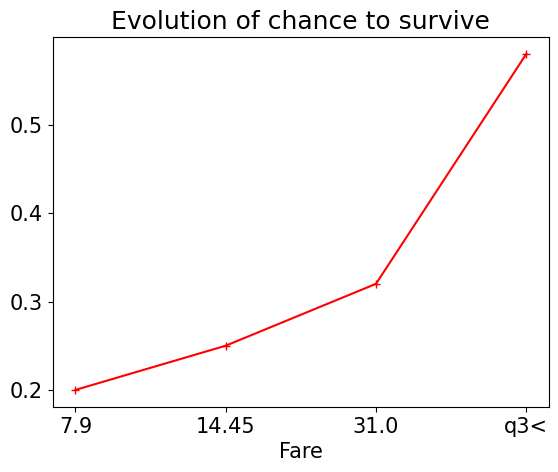

In [59]:
survivable_probabilities=survivable_probability(train_titanic,"Fare")
plt.plot(survivable_probabilities.keys(),survivable_probabilities.values(),"r+-")
plt.title("Evolution of chance to survive")
plt.xlabel("Fare")
plt.show()

The probability displayed here match exactly with our expectation after correlation coefficient analysis.

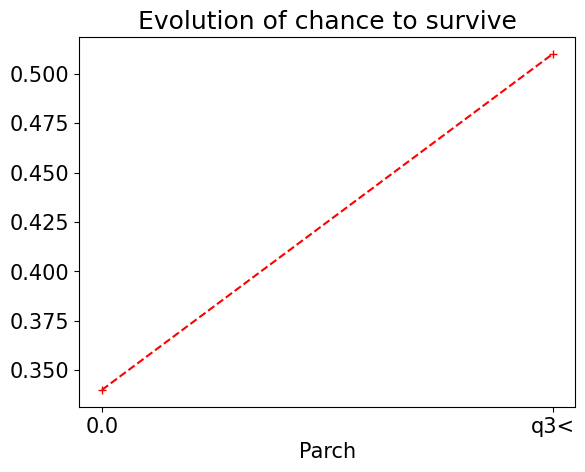

In [64]:
survivable_probabilities=survivable_probability(train_titanic,"Parch")
plt.plot(survivable_probabilities.keys(),survivable_probabilities.values(),"r+--")
plt.title("Evolution of chance to survive")
plt.xlabel("Parch")
plt.show()

This mean that they aren't so interesting relationship due to data skewed by more than 80% have 0 parch on the board as in down figure.

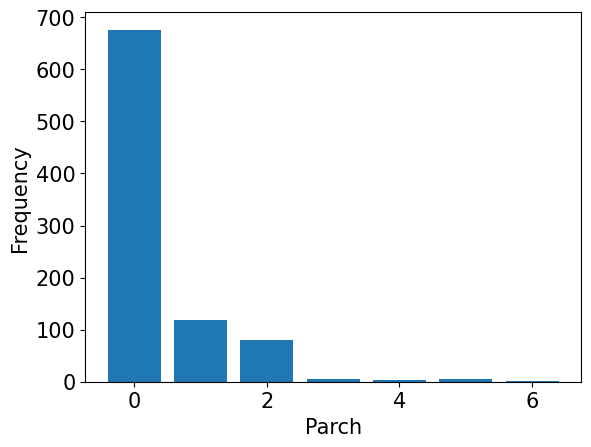

In [65]:
from typing import Counter


Count_parch=Counter(train_titanic["Parch"])

plt.bar(x=Count_parch.keys(),height=Count_parch.values())
plt.xlabel("Parch")
plt.ylabel("Frequency")
plt.show()

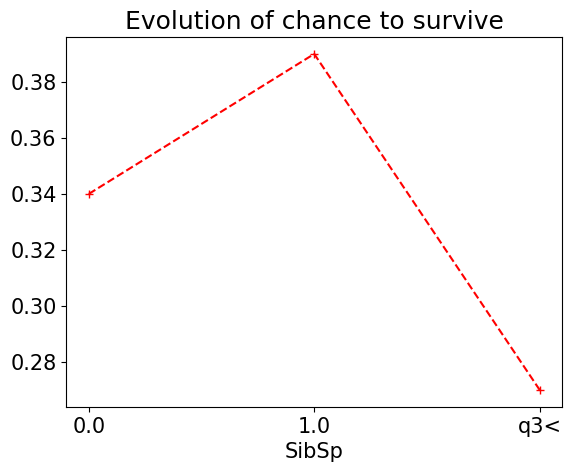

In [67]:
survivable_probabilities=survivable_probability(train_titanic,"SibSp")
plt.plot(survivable_probabilities.keys(),survivable_probabilities.values(),"r+--")
plt.title("Evolution of chance to survive")
plt.xlabel("SibSp")
plt.show()

Difficult also to give a right interpretation to this evolution. But it looks those with 1 or no siblings on board where more lucky.